In [5]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
import xgboost
import pickle

df_bank_note = pd.read_csv(r'data\Bank Note\data_banknote_authentication.txt', header=None)
df_bank_note.head(10)

,0,1,2,3,4
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [6]:
df_bank_note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
0    1372 non-null float64
1    1372 non-null float64
2    1372 non-null float64
3    1372 non-null float64
4    1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
#Missing values check
df_hr_employee.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [9]:
df_bank_note.corr()

,0,1,2,3,4
0,1.000000,0.264026,-0.380850,0.276817,-0.724843
1,0.264026,1.000000,-0.786895,-0.526321,-0.444688
2,-0.380850,-0.786895,1.000000,0.318841,0.155883
3,0.276817,-0.526321,0.318841,1.000000,-0.023424
4,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [12]:
#Checking target values distribution
df_bank_note.groupby(4).size()

4
0    762
1    610
dtype: int64

In [19]:
x = df_bank_note.drop(4, axis=1)

In [23]:
y = df_bank_note[4]

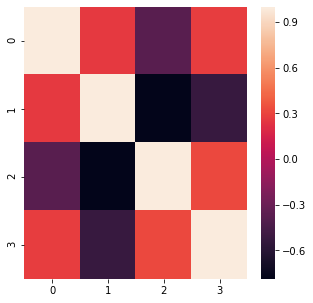

In [27]:
import seaborn as sb
plt.figure(figsize=(5,5))
heat_map = sb.heatmap(x.corr())
plt.show()

In [28]:
#There is strong negative correlation between 2 and 1 features. Dropping 1 from x data
x_new = x.drop(1,axis=1)

In [30]:
x_new.corr()

,0,2,3
0,1.000000,-0.380850,0.276817
2,-0.380850,1.000000,0.318841
3,0.276817,0.318841,1.000000


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

In [34]:
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : 1,
    'verbose': 0
}
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(**rf_params)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=1)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.990625 (0.007292)
LDA: 0.975000 (0.013340)
KNN: 0.998958 (0.003125)
CART: 0.977083 (0.015309)
NB: 0.850000 (0.028413)
SVM: 1.000000 (0.000000)
RF: 0.973958 (0.015625)


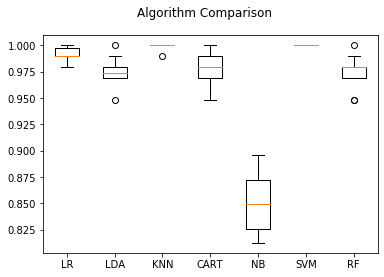

In [35]:

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##Based on above diagram, Logistic Regression is as this is not over-fit when compared to other algorithms